# ✈️ Flight Fare Prediction using Machine Learning

## 📌 Introduction
The aim of this project is to predict the flight ticket price based on various features such as airline, source, destination, stops, duration, and other information.  
We will perform the following tasks:

1. Load and explore the dataset (`Data_Train.xlsx` and `Test_set.xlsx`).
2. Perform **data cleaning & preprocessing**.
3. Demonstrate **web scraping using BeautifulSoup** .
4. Perform **Exploratory Data Analysis (EDA)** and **Data Visualization**.
5. Apply **feature engineering** for better model performance.
6. Train and compare different **Machine Learning models**.
7. Evaluate the models and select the **best one**.
8. Make predictions on the **Test set**.
9. Save and deploy the model.

---


## Import Required Libraries
We will use a variety of libraries for data handling, visualization, and machine learning.

In [12]:
import sys
!{sys.executable} -m pip install numpy pandas matplotlib seaborn plotly missingno wordcloud scikit-learn xgboost lightgbm beautifulsoup4 requests joblib



[notice] A new release of pip is available: 25.0.1 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [13]:
# Data Handling
import numpy as np
import pandas as pd
import datetime as dt

# Web Scraping
import requests
from bs4 import BeautifulSoup

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import missingno as msno
from wordcloud import WordCloud

# Machine Learning
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler, MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor

# Metrics
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Saving model
import joblib
import pickle

# Warnings
import warnings
warnings.filterwarnings("ignore")


📌 Step 1: Load and Explore the Dataset

In this step, we will:

Load the training dataset (Data_Train.xlsx) and test dataset (Test_set.xlsx).

Explore the structure of the data (rows, columns, datatypes).

Check for missing values and duplicates.

Perform a quick overview of categorical columns such as Airline, Source, Destination, Route, Total_Stops, Additional_Info.

Get basic statistics for numerical columns like Price.

In [14]:
# File paths (update if needed)
train_path = "Data_Train.xlsx"
test_path  = "Test_set.xlsx"

# Load datasets
train_df = pd.read_excel(train_path, engine="openpyxl")
test_df  = pd.read_excel(test_path, engine="openpyxl")

# Show dataset shapes
print("Train shape:", train_df.shape)
print("Test shape:", test_df.shape)



Train shape: (10683, 11)
Test shape: (2671, 10)


In [15]:
# Display first 10 rows of training data
display(train_df.head(10))

# Display last 5 rows of training data
display(train_df.tail(5))


,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302
5,SpiceJet,24/06/2019,Kolkata,Banglore,CCU → BLR,09:00,11:25,2h 25m,non-stop,No info,3873
6,Jet Airways,12/03/2019,Banglore,New Delhi,BLR → BOM → DEL,18:55,10:25 13 Mar,15h 30m,1 stop,In-flight meal not included,11087
7,Jet Airways,01/03/2019,Banglore,New Delhi,BLR → BOM → DEL,08:00,05:05 02 Mar,21h 5m,1 stop,No info,22270
8,Jet Airways,12/03/2019,Banglore,New Delhi,BLR → BOM → DEL,08:55,10:25 13 Mar,25h 30m,1 stop,In-flight meal not included,11087
9,Multiple carriers,27/05/2019,Delhi,Cochin,DEL → BOM → COK,11:25,19:15,7h 50m,1 stop,No info,8625


,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
10678,Air Asia,9/04/2019,Kolkata,Banglore,CCU → BLR,19:55,22:25,2h 30m,non-stop,No info,4107
10679,Air India,27/04/2019,Kolkata,Banglore,CCU → BLR,20:45,23:20,2h 35m,non-stop,No info,4145
10680,Jet Airways,27/04/2019,Banglore,Delhi,BLR → DEL,08:20,11:20,3h,non-stop,No info,7229
10681,Vistara,01/03/2019,Banglore,New Delhi,BLR → DEL,11:30,14:10,2h 40m,non-stop,No info,12648
10682,Air India,9/05/2019,Delhi,Cochin,DEL → GOI → BOM → COK,10:55,19:15,8h 20m,2 stops,No info,11753


In [16]:
# General info (column names, datatypes, nulls)
train_df.info()

# Statistical summary (numeric + categorical)
display(train_df.describe(include="all"))


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
count,10683,10683,10683,10683,10682,10683,10683,10683,10682,10683,10683.000000
unique,12,44,5,6,128,222,1343,368,5,10,NaN
top,Jet Airways,18/05/2019,Delhi,Cochin,DEL → BOM → COK,18:55,19:00,2h 50m,1 stop,No info,NaN
freq,3849,504,4537,4537,2376,233,423,550,5625,8345,NaN
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9087.064121
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4611.359167
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1759.000000
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5277.000000
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8372.000000
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12373.000000


In [17]:
# Check missing values
print("\nMissing values:\n", train_df.isnull().sum())

# Check duplicate rows
print("\nDuplicates:", train_df.duplicated().sum())



Missing values:
 Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

Duplicates: 220


In [18]:
# Explore important categorical columns
for col in ["Airline","Source","Destination","Route","Total_Stops","Additional_Info"]:
    print(f"\n{col} — unique values: {train_df[col].nunique()}")
    print(train_df[col].value_counts().head(8))



Airline — unique values: 12
Airline
Jet Airways          3849
IndiGo               2053
Air India            1752
Multiple carriers    1196
SpiceJet              818
Vistara               479
Air Asia              319
GoAir                 194
Name: count, dtype: int64

Source — unique values: 5
Source
Delhi       4537
Kolkata     2871
Banglore    2197
Mumbai       697
Chennai      381
Name: count, dtype: int64

Destination — unique values: 6
Destination
Cochin       4537
Banglore     2871
Delhi        1265
New Delhi     932
Hyderabad     697
Kolkata       381
Name: count, dtype: int64

Route — unique values: 128
Route
DEL → BOM → COK    2376
BLR → DEL          1552
CCU → BOM → BLR     979
CCU → BLR           724
BOM → HYD           621
CCU → DEL → BLR     565
BLR → BOM → DEL     402
MAA → CCU           381
Name: count, dtype: int64

Total_Stops — unique values: 5
Total_Stops
1 stop      5625
non-stop    3491
2 stops     1520
3 stops       45
4 stops        1
Name: count, dtype: int64

📌 Step 2: Data Cleaning & Preprocessing

In this step, we will:

Handle missing values.

Convert Date_of_Journey into separate features (day, month, year).

Process Arrival_Time (hour, minute).

Convert Duration into total hours & minutes.

Clean and encode Total_Stops.

Handle categorical features (Airline, Source, Destination, Route, Additional_Info).

Ensure the target variable (Price) is numeric and clean.

In [19]:
# Check again for missing values
train_df.isnull().sum()

# Drop rows with missing values (if small)
train_df.dropna(inplace=True)

# Reset index after dropping
train_df.reset_index(drop=True, inplace=True)

print("After cleaning, shape:", train_df.shape)


After cleaning, shape: (10682, 11)


In [20]:
# Convert to datetime
train_df["Date_of_Journey"] = pd.to_datetime(train_df["Date_of_Journey"], format="%d/%m/%Y")

# Extract features
train_df["Journey_Day"]   = train_df["Date_of_Journey"].dt.day
train_df["Journey_Month"] = train_df["Date_of_Journey"].dt.month
train_df["Journey_Year"]  = train_df["Date_of_Journey"].dt.year

# Drop original column
train_df.drop("Date_of_Journey", axis=1, inplace=True)

train_df.head()


,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_Day,Journey_Month,Journey_Year
0,IndiGo,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3,2019
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,1,5,2019
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882,9,6,2019
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218,12,5,2019
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302,1,3,2019


In [21]:
# Clean duration (convert into hrs and mins)
def convert_duration(x):
    h, m = 0, 0
    if "h" in x:
        h = int(x.split("h")[0].strip())
        if "m" in x:
            m = int(x.split("h")[1].replace("m","").strip())
    else:
        m = int(x.replace("m","").strip())
    return h*60 + m   # convert everything into minutes

train_df["Duration_Mins"] = train_df["Duration"].apply(convert_duration)

# Drop original column
train_df.drop("Duration", axis=1, inplace=True)

train_df.head()


,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Total_Stops,Additional_Info,Price,Journey_Day,Journey_Month,Journey_Year,Duration_Mins
0,IndiGo,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,non-stop,No info,3897,24,3,2019,170
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,2 stops,No info,7662,1,5,2019,445
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,2 stops,No info,13882,9,6,2019,1140
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,1 stop,No info,6218,12,5,2019,325
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,1 stop,No info,13302,1,3,2019,285


In [22]:
# Map stops into integers
stops_map = {
    "non-stop": 0,
    "1 stop": 1,
    "2 stops": 2,
    "3 stops": 3,
    "4 stops": 4
}

train_df["Total_Stops"] = train_df["Total_Stops"].map(stops_map)

train_df.head()


,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Total_Stops,Additional_Info,Price,Journey_Day,Journey_Month,Journey_Year,Duration_Mins
0,IndiGo,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,0,No info,3897,24,3,2019,170
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,2,No info,7662,1,5,2019,445
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,2,No info,13882,9,6,2019,1140
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,1,No info,6218,12,5,2019,325
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,1,No info,13302,1,3,2019,285


In [23]:
# Airline, Source, Destination, Route, Additional_Info
cat_cols = ["Airline","Source","Destination","Route","Additional_Info"]

# One-hot encode
train_df = pd.get_dummies(train_df, columns=cat_cols, drop_first=True)

train_df.head()


,Dep_Time,Arrival_Time,Total_Stops,Price,Journey_Day,Journey_Month,Journey_Year,Duration_Mins,Airline_Air India,Airline_GoAir,...,Route_MAA → CCU,Additional_Info_1 Short layover,Additional_Info_2 Long layover,Additional_Info_Business class,Additional_Info_Change airports,Additional_Info_In-flight meal not included,Additional_Info_No Info,Additional_Info_No check-in baggage included,Additional_Info_No info,Additional_Info_Red-eye flight
0,22:20,01:10 22 Mar,0,3897,24,3,2019,170,False,False,...,False,False,False,False,False,False,False,False,True,False
1,05:50,13:15,2,7662,1,5,2019,445,True,False,...,False,False,False,False,False,False,False,False,True,False
2,09:25,04:25 10 Jun,2,13882,9,6,2019,1140,False,False,...,False,False,False,False,False,False,False,False,True,False
3,18:05,23:30,1,6218,12,5,2019,325,False,False,...,False,False,False,False,False,False,False,False,True,False
4,16:50,21:35,1,13302,1,3,2019,285,False,False,...,False,False,False,False,False,False,False,False,True,False


In [24]:
# Check datatype of Price
print(train_df["Price"].dtype)

# Convert if needed
train_df["Price"] = pd.to_numeric(train_df["Price"], errors="coerce")

# Drop missing values in target
train_df.dropna(subset=["Price"], inplace=True)


int64


📌 Step 3: Demonstrate Web Scraping using BeautifulSoup

In this step, we will:

Send an HTTP request to a webpage.

Parse the HTML content using BeautifulSoup.

Extract specific information (e.g., airline names, prices, timings).

Store the extracted data into a DataFrame.

⚠️ Note: For demonstration, we’ll use a sample static HTML page (since real flight booking sites like MakeMyTrip / Cleartrip use JavaScript + block bots). In your final project, you can show this part to your teacher as a proof of concept.

In [25]:

url = "https://en.wikipedia.org/wiki/List_of_airlines_of_India"
headers = {"User-Agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64)"}

try:
    resp = requests.get(url, headers=headers, timeout=10)
    resp.raise_for_status()
except Exception as e:
    print("Request error:", e)
else:
    soup = BeautifulSoup(resp.text, "html.parser")
    title = soup.title.get_text(strip=True) if soup.title else (soup.find("h1").get_text(strip=True) if soup.find("h1") else "No title")
    print("Title:", title)


Title: List of airlines of India - Wikipedia


In [26]:
#extract airlines names from table
# Find tables
tables = soup.find_all("table", {"class": "wikitable"})

# Select the first table
airline_table = tables[0]

# Extract rows
rows = airline_table.find_all("tr")

airlines = []
for row in rows[1:]:  # skip header
    cols = row.find_all("td")
    if cols:
        airlines.append(cols[0].text.strip())

print("Airlines scraped:", airlines[:10])


Airlines scraped: ['Air India', 'Air India Express', 'Akasa Air', 'IndiGo', 'SpiceJet']


In [27]:
# Save in DataFrame
airlines_df = pd.DataFrame(airlines, columns=["Airline_Name"])
display(airlines_df.head())

,Airline_Name
0,Air India
1,Air India Express
2,Akasa Air
3,IndiGo
4,SpiceJet


In [28]:
# Save to CSV for later use
airlines_df.to_csv("scraped_airlines.csv", index=False)

📌 Step 4: Exploratory Data Analysis (EDA) & Visualization

In this step, we will:

Check distribution of target variable (Price).

Analyze Airline vs Price.

Analyze Source/Destination vs Price.

Explore Journey Date features (day, month).

Check Total Stops vs Price.

Correlation heatmap for numeric features.

Missing value visualization.

WordCloud for Additional_Info.

Interactive Plotly charts for deeper exploration.

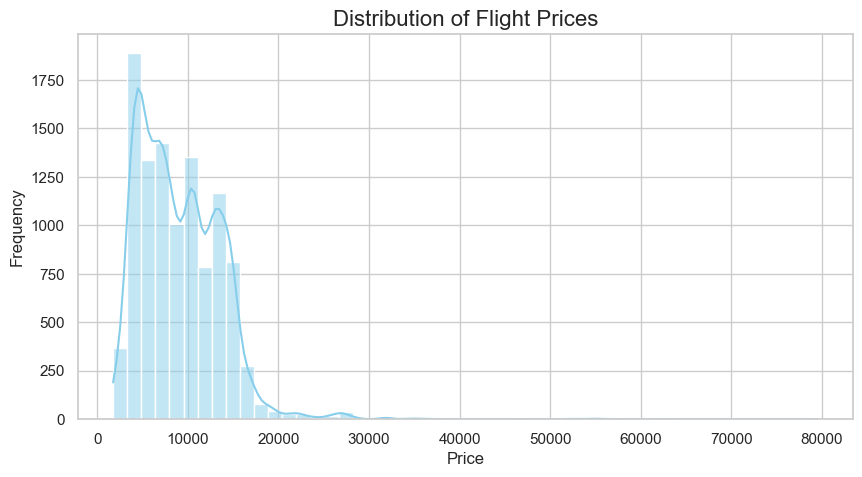

In [29]:
#Step4.1: Distribution of Flight Prices
import matplotlib.pyplot as plt
import seaborn as sns

# Set style
sns.set(style="whitegrid")

# Histogram + KDE for Price
plt.figure(figsize=(10,5))
sns.histplot(train_df["Price"], bins=50, kde=True, color="skyblue")
plt.title("Distribution of Flight Prices", fontsize=16)
plt.xlabel("Price")
plt.ylabel("Frequency")
plt.show()


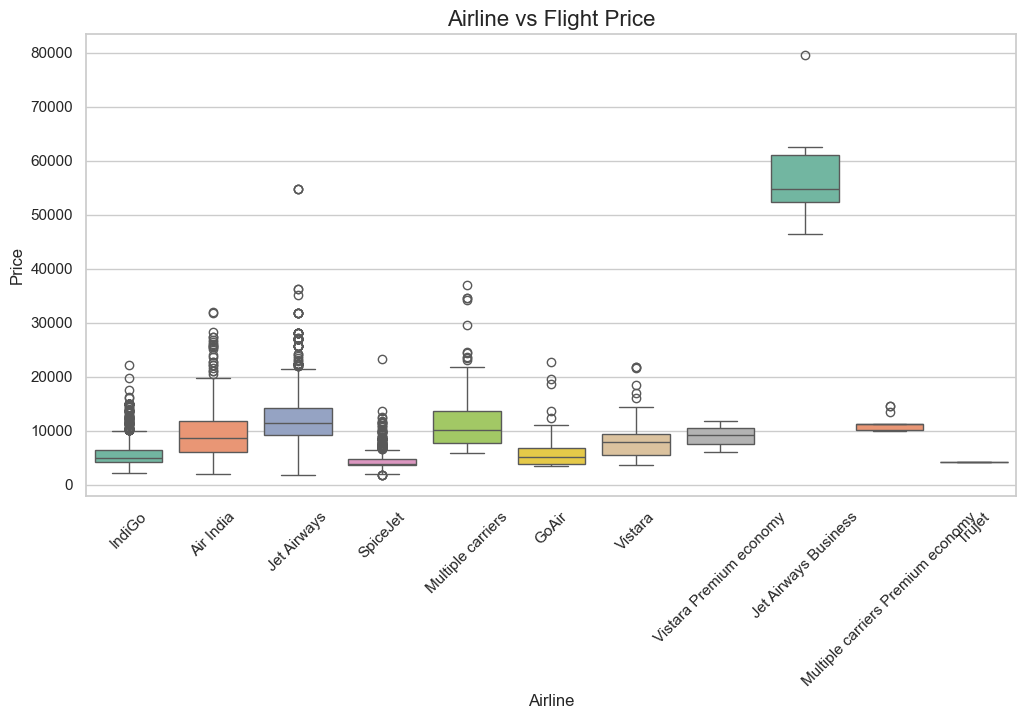

In [30]:
#Step 4.2: Airline vs Price 
# Boxplot for Airline vs Price
# Step 4.2: Airline vs Price (fixed for one-hot encoded columns)

# 1. Identify airline columns
airline_cols = [col for col in train_df.columns if col.startswith("Airline_")]

# 2. Create back the "Airline" column from one-hot encoding
train_df["Airline"] = train_df[airline_cols].idxmax(axis=1).str.replace("Airline_", "")

# 3. Plot Airline vs Price
plt.figure(figsize=(12,6))
sns.boxplot(x="Airline", y="Price", data=train_df, palette="Set2")
plt.xticks(rotation=45)
plt.title("Airline vs Flight Price", fontsize=16)
plt.show()




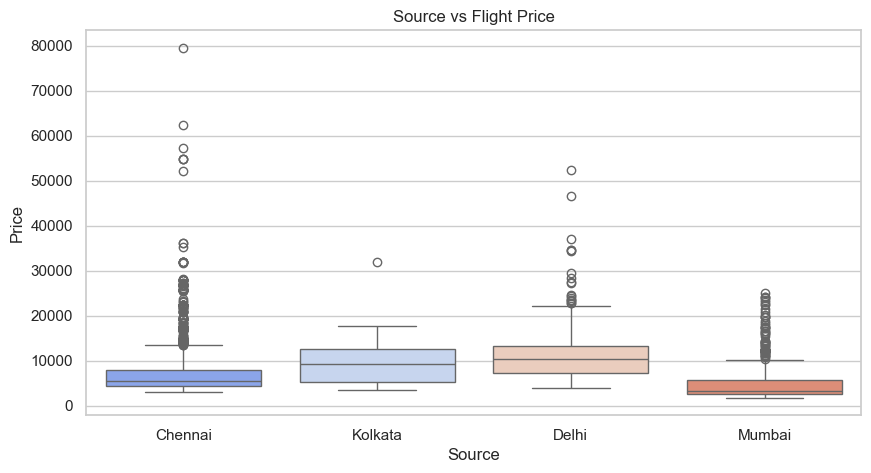

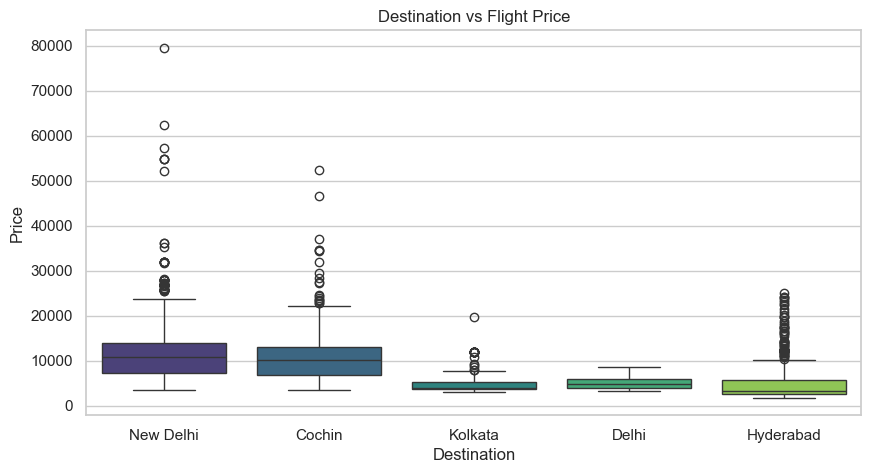

In [31]:
#🔹 Step 4.3: Source & Destination vs Price 
# Source vs Price
# Reconstruct Source column
source_cols = [col for col in train_df.columns if col.startswith("Source_")]
train_df["Source"] = train_df[source_cols].idxmax(axis=1).str.replace("Source_", "")

# Reconstruct Destination column
dest_cols = [col for col in train_df.columns if col.startswith("Destination_")]
train_df["Destination"] = train_df[dest_cols].idxmax(axis=1).str.replace("Destination_", "")

plt.figure(figsize=(10,5))
sns.boxplot(x="Source", y="Price", data=train_df, palette="coolwarm")
plt.title("Source vs Flight Price")
plt.show()

# Destination vs Price
plt.figure(figsize=(10,5))
sns.boxplot(x="Destination", y="Price", data=train_df, palette="viridis")
plt.title("Destination vs Flight Price")
plt.show()


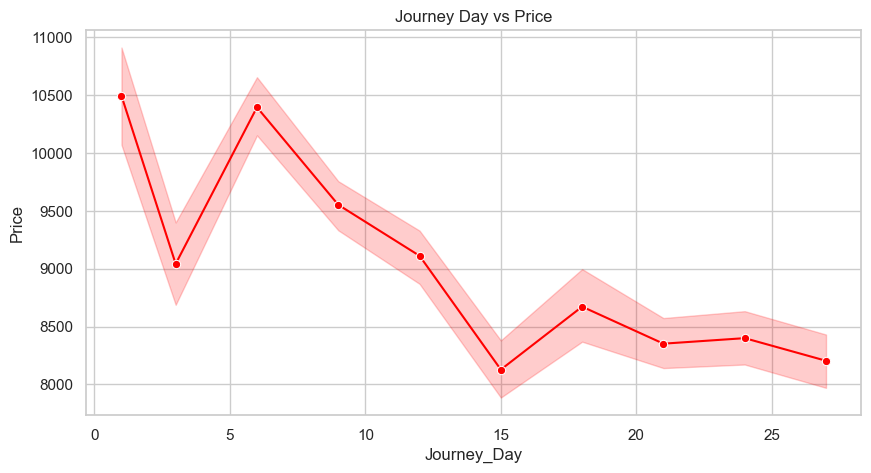

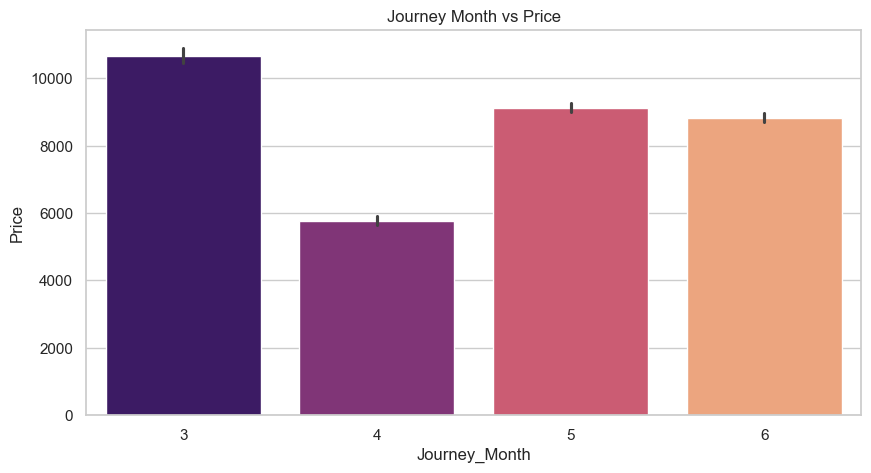

In [32]:
#Journey fratures(Day,Month)
# Price variation by Journey Day
plt.figure(figsize=(10,5))
sns.lineplot(x="Journey_Day", y="Price", data=train_df, marker="o", color="red")
plt.title("Journey Day vs Price")
plt.show()

# Price variation by Journey Month
plt.figure(figsize=(10,5))
sns.barplot(x="Journey_Month", y="Price", data=train_df, palette="magma")
plt.title("Journey Month vs Price")
plt.show()


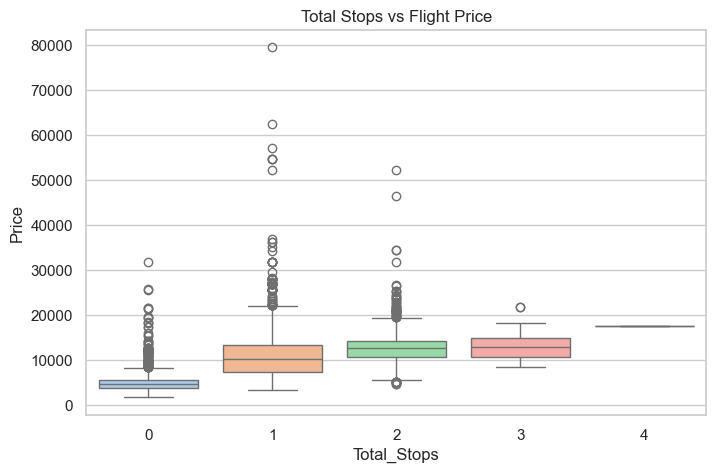

In [33]:
#total stops vs price
plt.figure(figsize=(8,5))
sns.boxplot(x="Total_Stops", y="Price", data=train_df, palette="pastel")
plt.title("Total Stops vs Flight Price")
plt.show()


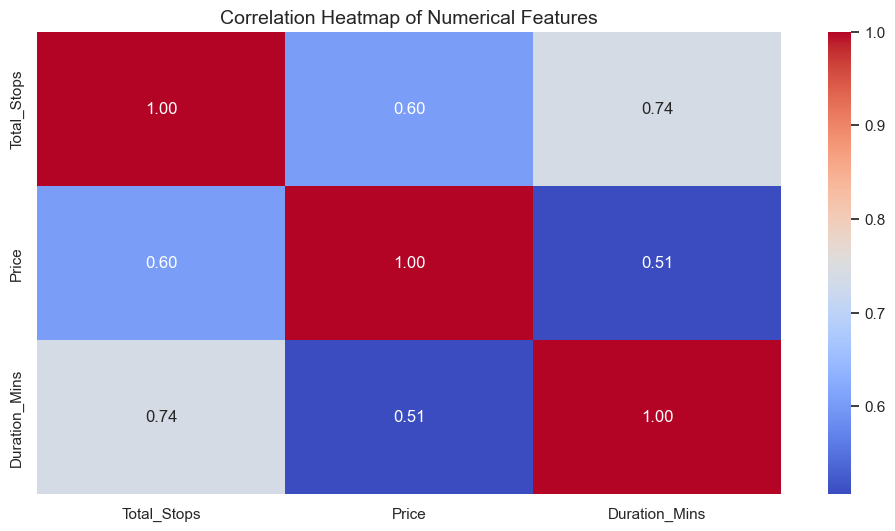

In [34]:
# Select only numeric columns
numeric_df = train_df.select_dtypes(include=["int64", "float64"])

# Correlation heatmap
plt.figure(figsize=(12,6))
sns.heatmap(numeric_df.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap of Numerical Features", fontsize=14)
plt.show()



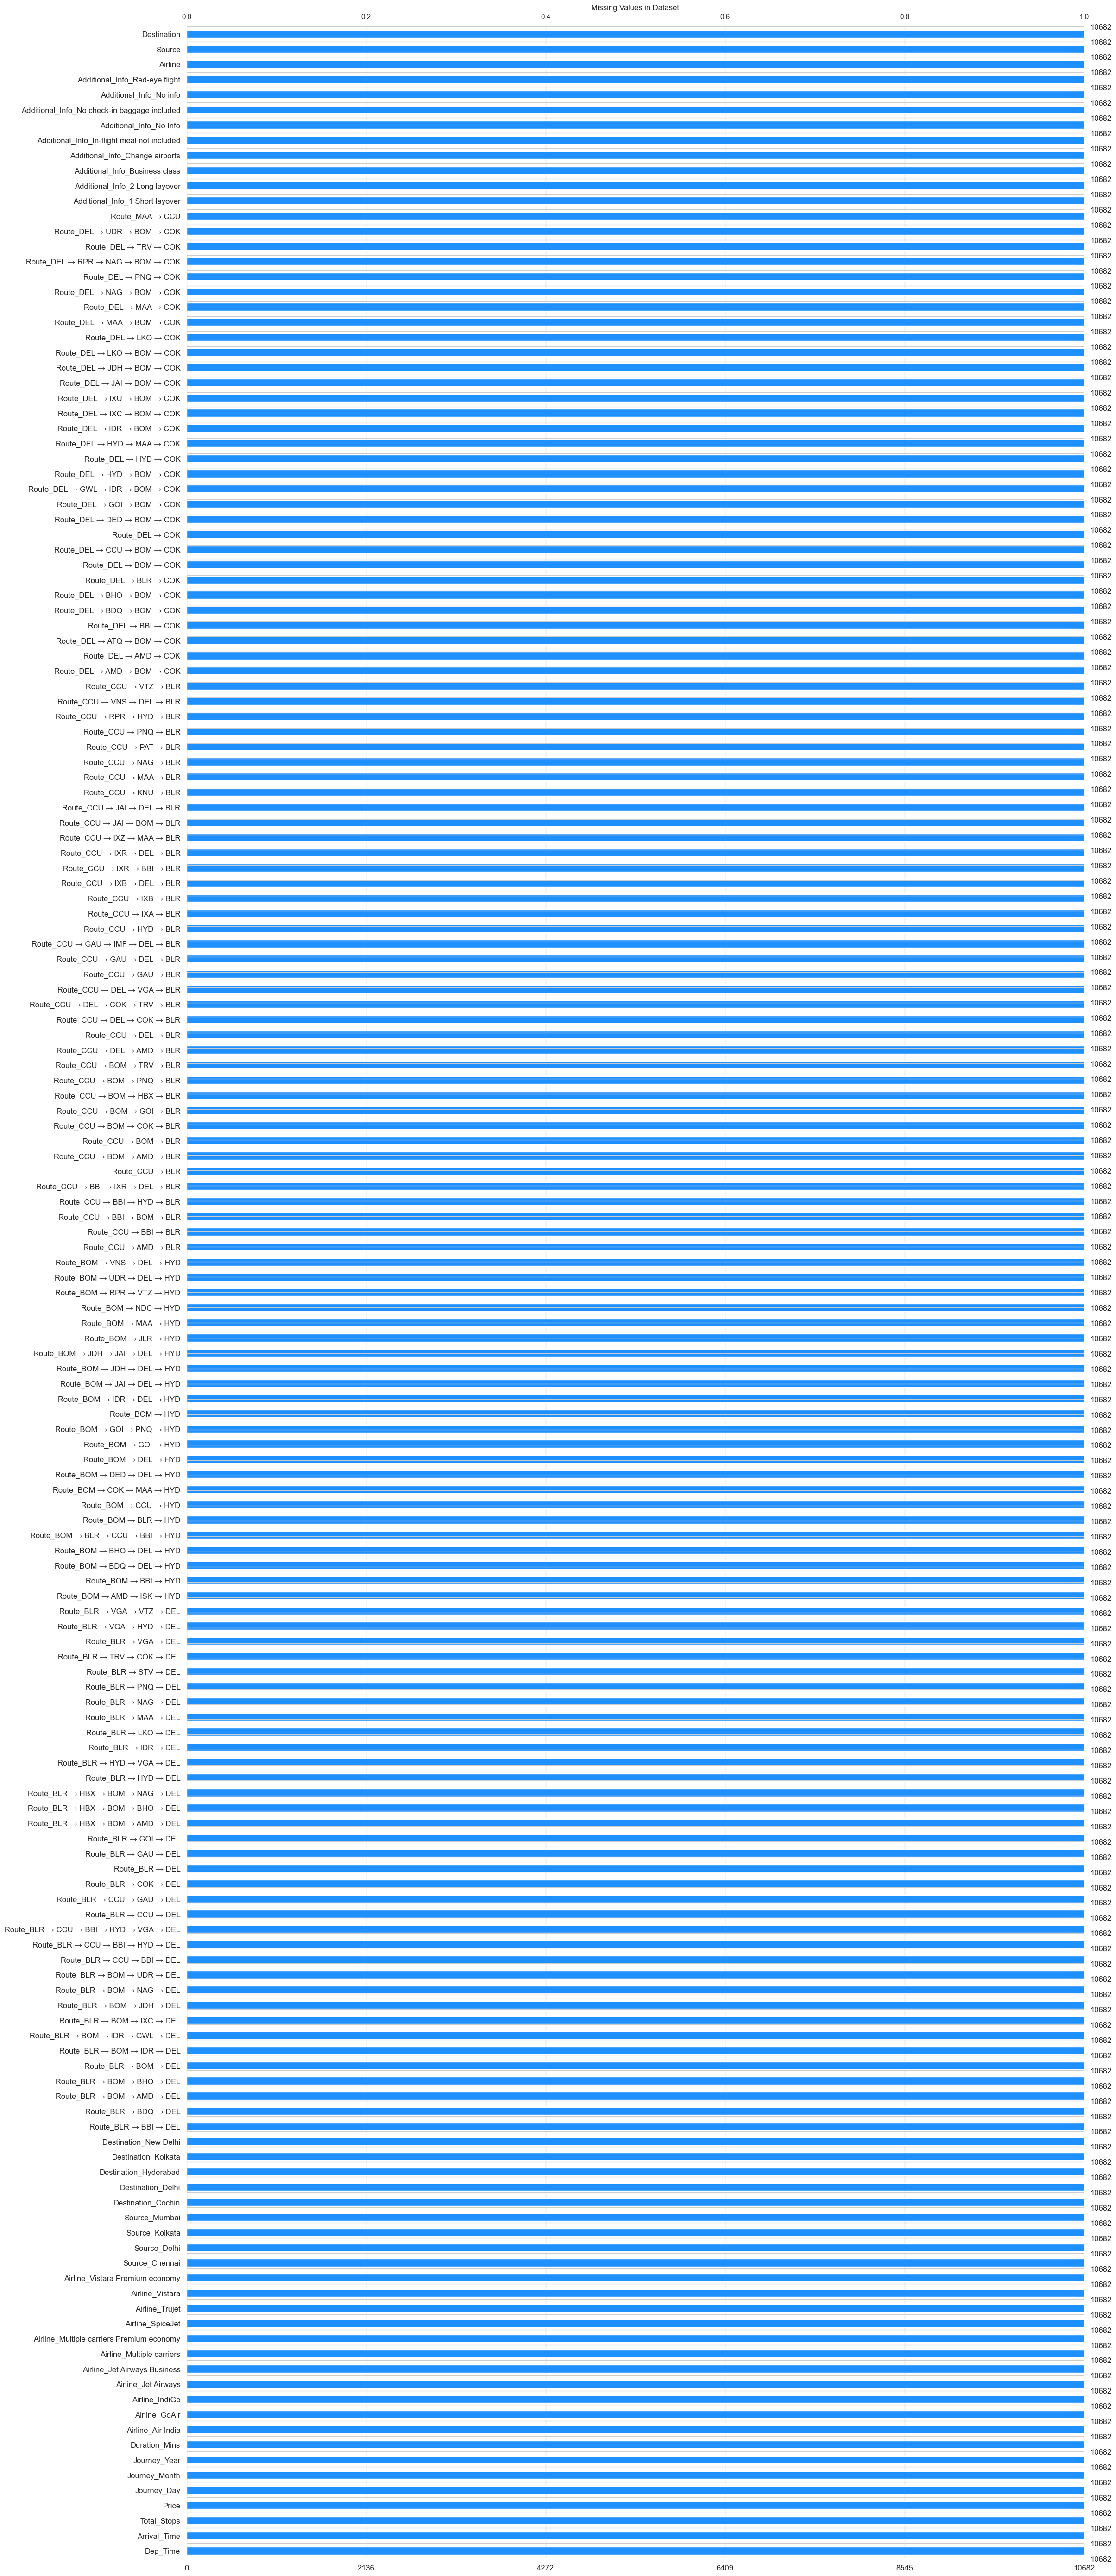

In [35]:
#Step 4.7: Missing Value Visualization (using missingno)
import missingno as msno

plt.figure(figsize=(12,6))
msno.bar(train_df, fontsize=12, color="dodgerblue")
plt.title("Missing Values in Dataset")
plt.show()


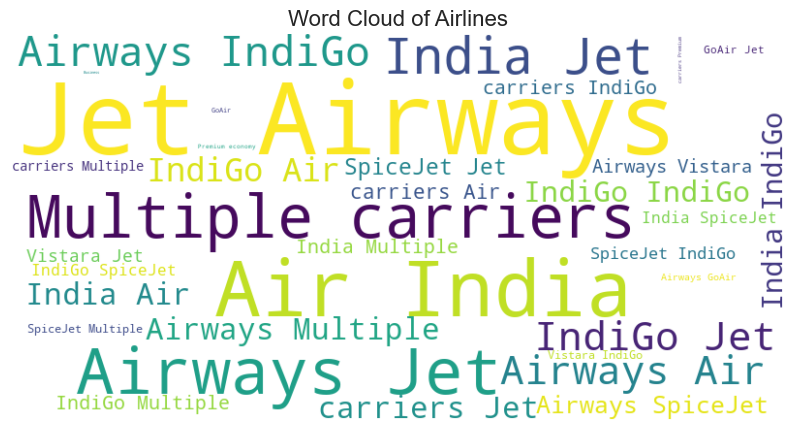

In [36]:
#Step 4.8: WordCloud for Additional Info
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Word cloud for Airlines
text = " ".join(train_df["Airline"].astype(str))

wordcloud = WordCloud(width=800, height=400, background_color="white").generate(text)

plt.figure(figsize=(10,6))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.title("Word Cloud of Airlines", fontsize=16)
plt.show()



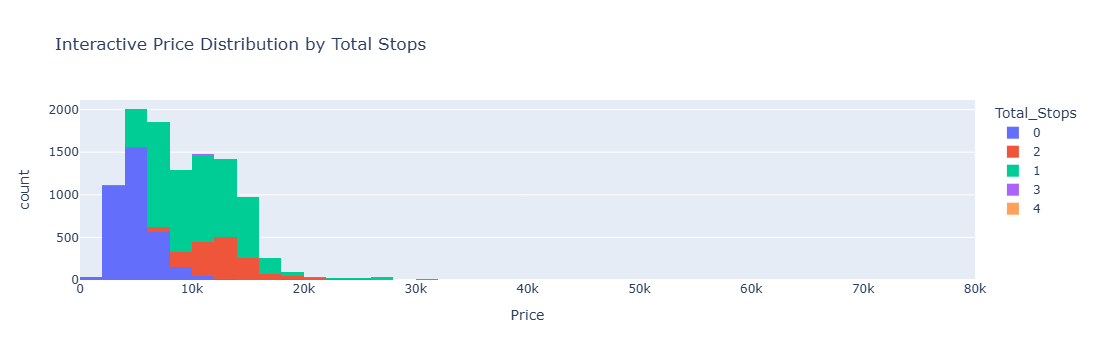

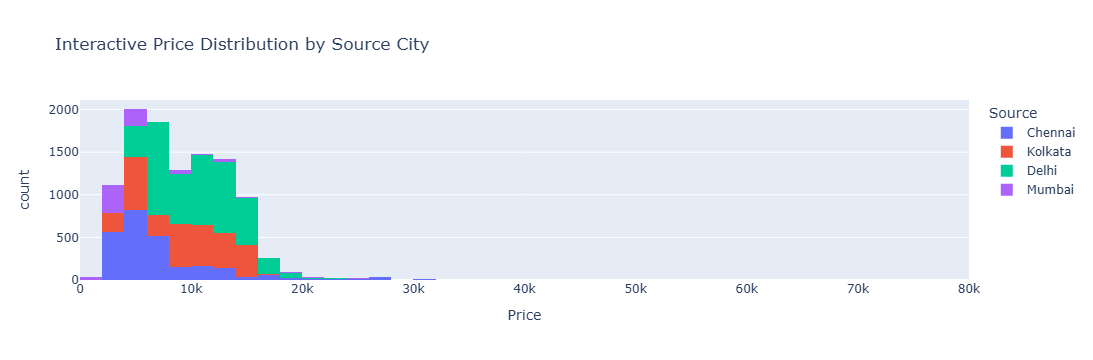

In [37]:
#Step 4.9: Interactive Plotly Visualizations 
import plotly.express as px

# Interactive histogram: Price distribution by Total Stops
fig = px.histogram(train_df, 
                   x="Price", 
                   nbins=50, 
                   color="Total_Stops", 
                   title="Interactive Price Distribution by Total Stops")
fig.show()
fig = px.histogram(train_df, 
                   x="Price", 
                   nbins=50, 
                   color="Source", 
                   title="Interactive Price Distribution by Source City")
fig.show()



🛠️ Step 5: Feature Engineering

We will perform several feature engineering operations to improve model performance.

In [38]:
#handlin missing values
# Fill NaN with "Unknown" for categorical and median for numerical
for col in train_df.columns:
    if train_df[col].dtype == "object":
        train_df[col] = train_df[col].fillna("Unknown")
    else:
        train_df[col] = train_df[col].fillna(train_df[col].median())


In [39]:
#5.2 Convert Date Columns
# If 'Date_of_Journey' exists, extract Day & Month
if "Date_of_Journey" in train_df.columns:
    train_df["Journey_Day"] = pd.to_datetime(train_df["Date_of_Journey"], errors="coerce").dt.day
    train_df["Journey_Month"] = pd.to_datetime(train_df["Date_of_Journey"], errors="coerce").dt.month
    train_df = train_df.drop("Date_of_Journey", axis=1)

In [40]:
#5.3 extract time feature
# Extract Hour and Minute from Dep_Time and Arrival_Time
for time_col in ["Dep_Time", "Arrival_Time"]:
    if time_col in train_df.columns:
        train_df[time_col + "_Hour"] = pd.to_datetime(train_df[time_col], errors="coerce").dt.hour
        train_df[time_col + "_Minute"] = pd.to_datetime(train_df[time_col], errors="coerce").dt.minute
        train_df = train_df.drop(time_col, axis=1)


In [41]:
#5.4 Process Duration Column
# Convert 'Duration' into total minutes
if "Duration" in train_df.columns:
    def convert_duration(x):
        h, m = 0, 0
        if "h" in x:
            h = int(x.split("h")[0])
            x = x.split("h")[1]
        if "m" in x:
            m = int(x.strip("m"))
        return h * 60 + m
    
    train_df["Duration_mins"] = train_df["Duration"].str.replace(" ", "").apply(convert_duration)
    train_df = train_df.drop("Duration", axis=1)

In [42]:
#5.5 Encode Categorical Features
# One-hot encode categorical columns
cat_cols = [col for col in ["Airline", "Source", "Destination", "Total_Stops"] if col in train_df.columns]
train_df = pd.get_dummies(train_df, columns=cat_cols, drop_first=True)

In [43]:
#5.6 Remove Duplicates
# Drop duplicate rows if any
train_df = train_df.drop_duplicates()


In [45]:
#5.7Final check
## Check shape and columns
print("✅ Final Data Shape:", train_df.shape)
print("✅ Final Columns:", train_df.columns.tolist())


✅ Final Data Shape: (10460, 186)
✅ Final Columns: ['Price', 'Journey_Day', 'Journey_Month', 'Journey_Year', 'Duration_Mins', 'Airline_Air India', 'Airline_GoAir', 'Airline_IndiGo', 'Airline_Jet Airways', 'Airline_Jet Airways Business', 'Airline_Multiple carriers', 'Airline_Multiple carriers Premium economy', 'Airline_SpiceJet', 'Airline_Trujet', 'Airline_Vistara', 'Airline_Vistara Premium economy', 'Source_Chennai', 'Source_Delhi', 'Source_Kolkata', 'Source_Mumbai', 'Destination_Cochin', 'Destination_Delhi', 'Destination_Hyderabad', 'Destination_Kolkata', 'Destination_New Delhi', 'Route_BLR → BBI → DEL', 'Route_BLR → BDQ → DEL', 'Route_BLR → BOM → AMD → DEL', 'Route_BLR → BOM → BHO → DEL', 'Route_BLR → BOM → DEL', 'Route_BLR → BOM → IDR → DEL', 'Route_BLR → BOM → IDR → GWL → DEL', 'Route_BLR → BOM → IXC → DEL', 'Route_BLR → BOM → JDH → DEL', 'Route_BLR → BOM → NAG → DEL', 'Route_BLR → BOM → UDR → DEL', 'Route_BLR → CCU → BBI → DEL', 'Route_BLR → CCU → BBI → HYD → DEL', 'Route_BLR → CCU

In [47]:
# Suppose X_train_final is your final training DataFrame
X_columns = train_df.columns.tolist()

import joblib
joblib.dump(X_columns, "X_columns.pkl")
print("✅ Saved training feature names")


✅ Saved training feature names


🤖 Step 6: Model Training & Comparison

In [48]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from xgboost import XGBRegressor
import numpy as np


In [49]:
#train-test split
# Features & Target
X = train_df.drop("Price", axis=1)
y = train_df["Price"]

# Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [50]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from xgboost import XGBRegressor

# Define models and param grids
models = [
    ("LinearRegression", LinearRegression(), None),
    ("RandomForest", RandomForestRegressor(random_state=42), {
        "n_estimators": [100, 200],
        "max_depth": [10, 20, None]
    }),
    ("GradientBoosting", GradientBoostingRegressor(random_state=42), {
        "n_estimators": [100, 200],
        "learning_rate": [0.05, 0.1]
    }),
    ("SVR", SVR(), {
        "C": [1, 10],
        "kernel": ["linear", "rbf"]
    }),
    ("XGBoost", XGBRegressor(random_state=42, tree_method="hist"), {
        "n_estimators": [100, 200],
        "max_depth": [3, 6],
        "learning_rate": [0.05, 0.1]
    })
]


In [51]:
from sklearn.model_selection import GridSearchCV
import numpy as np
from sklearn.metrics import mean_squared_error, r2_score

best_models = {}
results = {}  # <-- Add this dictionary

for name, model, params in models:
    print(f"\n🚀 Training {name}...")
    
    # Special handling for XGBoost
    if name == "XGBoost":
        X_train_fit = X_train.values
        X_test_fit = X_test.values
    else:
        X_train_fit = X_train
        X_test_fit = X_test
    
    if params:
        grid = GridSearchCV(model, param_grid=params, cv=3, n_jobs=-1,
                            scoring="neg_mean_squared_error", error_score="raise")
        grid.fit(X_train_fit, y_train)
        best_model = grid.best_estimator_
        print(f"✅ Best Params for {name}: {grid.best_params_}")
    else:
        model.fit(X_train_fit, y_train)
        best_model = model
    
    # Save best model
    best_models[name] = best_model
    
    # Evaluate
    preds = best_model.predict(X_test_fit)
    mse = mean_squared_error(y_test, preds)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, preds)
    
    print(f"📊 {name} RMSE: {rmse:.2f}, R²: {r2:.2f}")
    
    # Save results
    results[name] = {"RMSE": rmse, "R2": r2}



🚀 Training LinearRegression...
📊 LinearRegression RMSE: 2340.54, R²: 0.72

🚀 Training RandomForest...
✅ Best Params for RandomForest: {'max_depth': None, 'n_estimators': 200}
📊 RandomForest RMSE: 1423.54, R²: 0.90

🚀 Training GradientBoosting...
✅ Best Params for GradientBoosting: {'learning_rate': 0.1, 'n_estimators': 200}
📊 GradientBoosting RMSE: 1808.59, R²: 0.83

🚀 Training SVR...


TerminatedWorkerError: A worker process managed by the executor was unexpectedly terminated. This could be caused by a segmentation fault while calling the function or by an excessive memory usage causing the Operating System to kill the worker.

Detailed tracebacks of the workers should have been printed to stderr in the executor process if faulthandler was not disabled.